**Student Name: SOJI JOHN    Stud Id: 0626734**

**Masters Programme: Masters in Applied Informatics: AI**

**#RESEARCH QUESTION: How does model complexity influence decision boundaries or fitted functions?**
It's a fundemental understanding of trade offs in machine learning and it matters especially in terms of underfitting , overfitting and generalization.
In ml problems our goal is to build the model well on training data as well as unseen data so that they generalize well. Here comes the model complexity
the too simple model may not capture the true structures of data and cause underfitting. Likewise, too  complex model might overfit memorizing noise or specific
patterns in training data and not generalize well. So, in my research i am trying to investigate balance between simplicity and expressiveness to determine 
how complexity affects generalization.

Motivation & Problem Statement

In machine learning, striking the right balance between a model's simplicity and its ability to capture complex patterns is critical. Simple models like linear regression or logistic regression are easy to interpret and generalize well on unseen data, but may underfit complex datasets. Conversely, complex models such as decision trees or high-degree polynomial regression can capture intricate data relationships but often risk overfitting.

This research explores how model complexity affects:

The shape and behavior of decision boundaries in classification.

The fit of regression functions in regression tasks.

The investigation is grounded in core machine learning concepts such as the bias-variance trade-off, overfitting vs underfitting, and generalization. Understanding these relationships is vital not just for model selection, but for building interpretable, scalable, and reliable ML systems.



## Appendix

### A. Logistic Regression

Let  
\[
\{(x_n, y_n) : x_n \in \mathbb{R}^d, y_n \in \{0, 1\}\}
\]  
be the dataset. Logistic Regression models the probability of class 1 as:  
\[
P(y = 1 \mid x) = \frac{1}{1 + e^{-w^T x}}
\]  
The cost function is the negative log-likelihood:  
\[
\mathcal{L}(w) = -\sum_{n=1}^N [ y_n \log(\sigma(w^T x_n)) + (1 - y_n) \log(1 - \sigma(w^T x_n)) ]
\]  
Gradient descent is used to optimize weights.

---

### B. Decision Tree Classifier

A decision tree recursively partitions the feature space using rules like:  
\[
x_j \leq \theta
\]  
It uses metrics like **Gini Impurity** or **Entropy** to split data.  
\[
G(D) = 1 - \sum p_k^2
\]  
Key hyperparameters:
- `max_depth`: Tree depth (controls complexity)
- `min_samples_leaf`: Minimum samples at leaf nodes

---


### D. Linear Regression

Fits a model:  
\[
\hat{y} = w^T x + b
\]  
Optimized by minimizing MSE:  
\[
\mathcal{L}(w) = \frac{1}{N} \sum (y_n - w^T x_n)^2
\]  
Closed-form solution exists.

---

### E. Polynomial Regression

Extends linear regression using polynomial features:  
\[
\hat{y} = w_0 + w_1 x + w_2 x^2 + \cdots + w_d x^d
\]  
Implemented via a pipeline (`PolynomialFeatures` + `LinearRegression`).  
Higher degree = more complexity.






#new code support by jg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from matplotlib.colors import ListedColormap

sns.set(style="whitegrid")


In [ ]:
<>

In [2]:
# ## 3. Classification: Effect of Model Complexity on Decision Boundaries

# ### 3.1 Generate Synthetic 2D Classification Dataset
X_cls, y_cls = make_classification(n_samples=500, n_features=2, n_informative=2,
                                   n_redundant=0, n_clusters_per_class=1,
                                   class_sep=1.2, random_state=42)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)


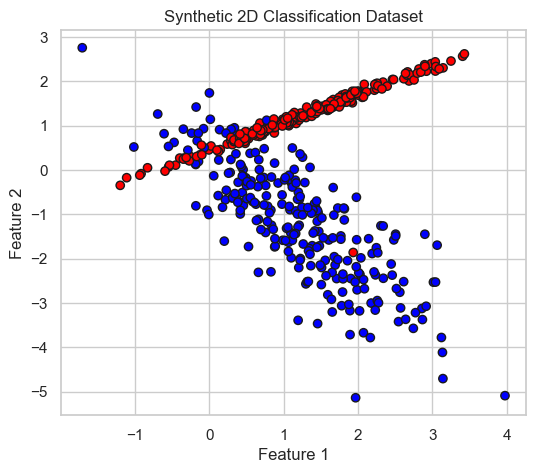

In [3]:
# ### 3.2 Visualize Dataset
plt.figure(figsize=(6, 5))
plt.scatter(X_cls[:, 0], X_cls[:, 1], c=y_cls, cmap='bwr', edgecolor='k')
plt.title("Synthetic 2D Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
The above scatter plot shows how synthetic dataset containing 2 features plotted. The feature 1 and feature 2 are the two variables to classify the datapoints.
The blue datapoints belongs to class 0 and red points belongs to class 1. This plot explores how machine learning model separate the red and blue dataapoints
based on the values of feature1 and 2. The model complexity can determine the shape of decision boundary that creates difference between the classes.

Next, we can check how a simple model affects the model complexity. here, i am using the logistic regression as the base model with parameter 'c'for this classification task.
And, how the model determine the shape of the decision boundary that is linearly separated data points.    
 #The complexity of the model would determine the shape of the decision boundary it creates to distinguish between the classes. A simple model 
#might create a linear boundary, while a more complex model could create a curved or non-linear boundary to better fit the data.

In [ ]:
Algorithm 1:Logistic Regression
It is a classification algorithm to predict the probability of datapoints that belongs to the particular class. In this algorithm I use the parameter 
C that controls the regularization strength, which affects how complex or simple the model is.Regularization is a technique used to prevent overfitting 
by penalizing large model weights during training. Overfitting happens when a model learns the noise in training data instead of general patterns.
Regularization helps by adding a penalty term to the loss function, discouraging the model from having overly large coefficients (weights).
In this algorithm we use three different value of c parameters
c = 0.01
c = 1	 
c = 100	




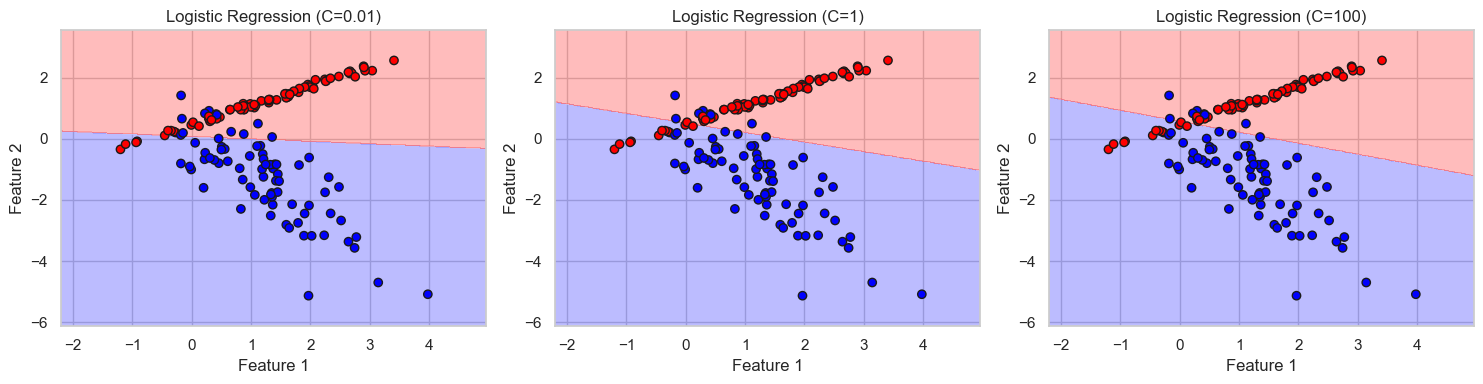

In [4]:
# ### 3.3 Logistic Regression with Varying Regularization

def plot_decision_boundary(model, X, y, ax, title=""):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
Cs = [0.01, 1, 100]

for i, C in enumerate(Cs):
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(Xc_train, yc_train)
    plot_decision_boundary(model, Xc_test, yc_test, axes[i], title=f"Logistic Regression (C={C})")

plt.tight_layout()
plt.show()


In [ ]:
After, applying the logistic regression algorithm we can see how model complexity affects with three different c values in the same model.
plot 1  used c = 0.01 which has high regularization simpler model and it may leads to underfit
plot 2 used c = 1	this has a moderate regularization so its a Balanced model 
plot 3 used c = 100	 this has Low regularization and its a more complex model and also it may leads to overfit.
the effect of the complexity parameter 'C' on the decision boundaries in Logistic Regression, based on the provided plots:
Regularization strength is the penalty applied to large weights.

C is inversely proportional to this strength:

Regularization strength=1𝐶
Regularization strength= C1​
 

Report on the Influence of Model Complexity (C) on Decision Boundaries in Logistic Regression

This report analyzes the impact of the regularization parameter 'C' on the decision boundaries and fitted functions of a Logistic Regression model.
The plots visualize the classification of a synthetic 2D dataset, where red and blue points represent different classes. The x and y-axes represent
"Feature 1" and "Feature 2", respectively.

Experimental Setup:
A Logistic Regression model was trained on the dataset using three different values for the inverse of the regularization strength, 'C': 0.01, 1, 
and 100. The plots show the resulting decision boundaries for each 'C' value.
Observations and Analysis:
C = 0.01 (High Regularization): The model exhibits strong regularization. The decision boundary is nearly linear and relatively simple. The model 
prioritizes simplicity over fitting the training data perfectly, leading to some misclassification of points, especially those near the boundary. 
The blue shaded area represents the predicted class for blue points, and the red shaded area represents the predicted class for red points.
C = 1 (Moderate Regularization): The model shows a balance between fitting the data and maintaining simplicity. The decision boundary is still largely 
linear but adjusts slightly to better separate the classes. There's a noticeable improvement in correctly classifying points compared to C=0.01.
C = 100 (Low Regularization): The model has very weak regularization. The decision boundary becomes more complex and attempts to fit the training data 
as closely as possible. This can lead to a more accurate classification on the training data but might increase the risk of overfitting, where the model
performs poorly on unseen data. The decision boundary shows a more complex, slightly curved shape.
Conclusion:
The complexity parameter 'C' in Logistic Regression significantly influences the model's decision boundaries. Lower values of 'C' (e.g., 0.01) enforce 
stronger regularization, resulting in simpler, more linear decision boundaries. Higher values of 'C' (e.g., 100) reduce regularization, allowing the model 
to create more complex, potentially non-linear decision boundaries. The choice of 'C' should be made carefully, considering the trade-off between model complexity, 
training accuracy, and generalization performance to avoid overfitting.

In [19]:
Next, we are trying different algorithm is decision tree fore increasing the model complexity.
for this, here i am using the parameters are max_tree septh and 

SyntaxError: invalid syntax (875089468.py, line 1)

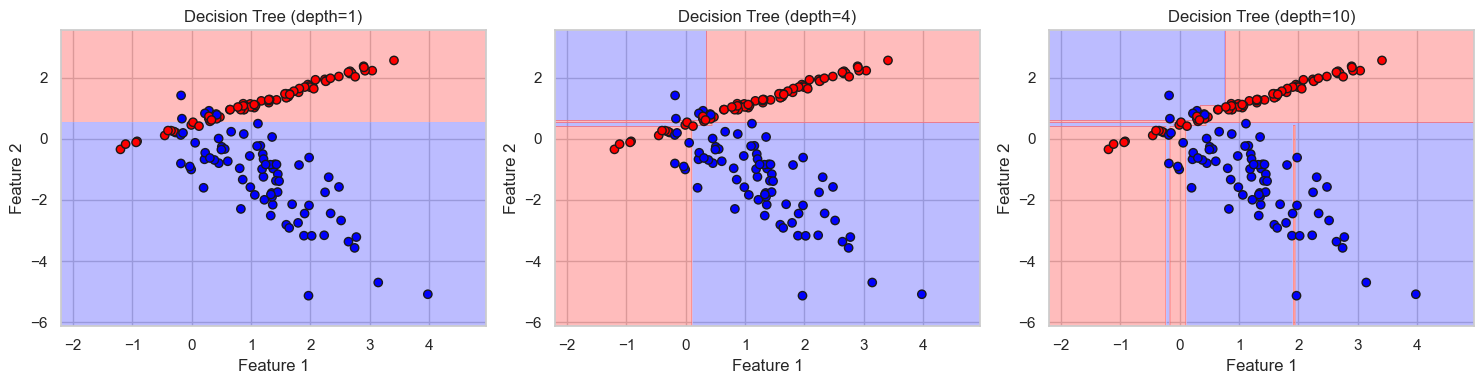

In [5]:
# ### 3.4 Decision Tree Classifier with Varying Depth

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
depths = [1, 4, 10]

for i, d in enumerate(depths):
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(Xc_train, yc_train)
    plot_decision_boundary(model, Xc_test, yc_test, axes[i], title=f"Decision Tree (depth={d})")

plt.tight_layout()
plt.show()


In [ ]:
the effect of model complexity (tree depth) on the decision boundaries in Decision Trees, based on the provided plots:
Report on the Influence of Model Complexity (Tree Depth) on Decision Boundaries in Decision Trees
This report analyzes the impact of the maximum depth parameter on the decision boundaries of a Decision Tree model. The plots visualize the
classification of the same synthetic 2D dataset used previously, with red and blue points representing different classes based on "Feature 1" and 
"Feature 2."
Experimental Setup: 
A Decision Tree classifier was trained on the dataset using three different maximum depths: 1, 4, and 10. The plots illustrate the resulting decision 
boundaries for each depth.
Observations and Analysis: Decision Tree (depth=1) (Low Complexity): With a maximum depth of 1, the decision tree is highly constrained and represents a 
simple model. The decision boundary consists of a single horizontal line. This simple boundary struggles to separate the two classes effectively, 
resulting in significant misclassification of both red and blue points. The shaded regions indicate the predicted class for each area of the feature 
space.
Decision Tree (depth=4) (Moderate Complexity): Increasing the maximum depth to 4 allows the tree to create more complex decision boundaries. We observe 
multiple horizontal and vertical lines, partitioning the feature space into several rectangular regions. This increased complexity enables the model to 
better fit the training data, resulting in fewer misclassified points compared to the depth=1 tree. The decision boundaries start to follow the general 
trend of the data distribution more closely.
Decision Tree (depth=10) (High Complexity): With a maximum depth of 10, the decision tree becomes highly complex. The decision boundaries are now 
composed of numerous horizontal and vertical segments, creating many small rectangular regions. This highly flexible model attempts to perfectly classify almost all the training data points. However, this high complexity can lead to overfitting, where the model learns the noise in the training data and may not generalize well to new, unseen data. The decision boundaries appear very intricate and closely follow individual data points.
Conclusion:
The maximum depth of a Decision Tree significantly controls the model's complexity and, consequently, the shape of its decision boundaries.
Shallow trees (low depth) create simple, linear decision boundaries that may underfit the data.
Trees with moderate depth can capture more complex relationships, leading to better fitting boundaries.
Deep trees (high depth) can generate very intricate, non-linear decision boundaries that may perfectly fit the training data but are prone to 
overfitting.
The optimal tree depth should be chosen carefully through techniques like cross-validation to strike a balance between model complexity, training 
accuracy, and the ability to generalize to unseen data.

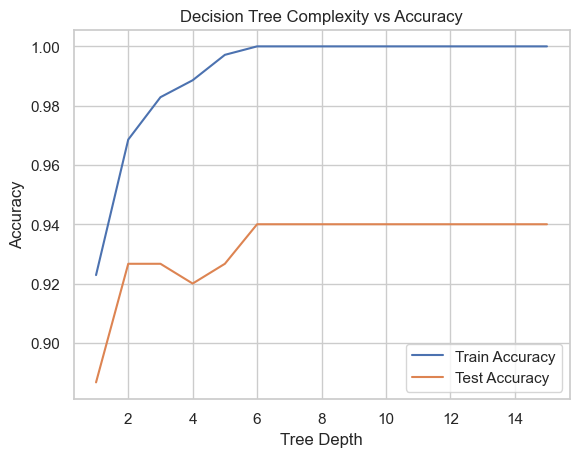

In [25]:
# ### 3.5 Accuracy vs Model Complexity (Decision Tree)
train_acc = []
test_acc = []
all_depths = range(1, 16)

for d in all_depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(Xc_train, yc_train)
    train_acc.append(tree.score(Xc_train, yc_train))
    test_acc.append(tree.score(Xc_test, yc_test))

plt.plot(all_depths, train_acc, label="Train Accuracy")
plt.plot(all_depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Complexity vs Accuracy")
plt.legend()
plt.show()


In [ ]:
analyzing the relationship between model complexity (tree depth) and accuracy for a Decision Tree classifier, based on the provided plot:
Report on the Impact of Model Complexity (Tree Depth) on Training and Test Accuracy of a Decision Tree
This report examines how the complexity of a Decision Tree model, controlled by its maximum depth, affects its performance on both the training and a 
separate test dataset. The plot shows the training accuracy (blue line) and test accuracy (orange line) of the Decision Tree model as the maximum tree 
depth increases from 1 to 15.

Observations and Analysis:
Low Complexity (Shallow Trees): At very low tree depths (e.g., depth=1), both the training and test accuracies are relatively low. This indicates that 
the model is too simple to capture the underlying patterns in the data, leading to underfitting.
Increasing Complexity (Moderate Depth): As the tree depth increases, we observe a rapid increase in the training accuracy. The model becomes more 
complex and can better fit the training data. The test accuracy also initially improves, suggesting that the increased complexity allows the model to 
generalize better to unseen data.
High Complexity (Deep Trees): Beyond a certain point (around depth=6 or 7 in this plot), the training accuracy continues to increase and eventually 
reaches 1.0, indicating that the model perfectly fits the training data. However, the test accuracy starts to plateau and then even decreases. This 
phenomenon is known as overfitting. The highly complex model learns the noise and specific details of the training data that do not generalize to the test data.
Optimal Complexity: The plot suggests that there is an optimal level of complexity (tree depth) where the test accuracy is maximized. In this case, it appears 
to be around a depth of 6 or 7. Beyond this point, increasing the model complexity leads to a decline in the model's ability to generalize to new data.
Conclusion:
The complexity of a Decision Tree, as controlled by its maximum depth, has a significant impact on its accuracy.
Underfitting occurs when the model is too simple (low depth) and cannot capture the underlying patterns, resulting in low accuracy on both training and test sets.
Overfitting occurs when the model is too complex (high depth) and learns the noise in the training data, leading to high training accuracy but poor generalization and 
lower test accuracy.
There exists an optimal level of complexity where the model achieves a good balance between fitting the training data and generalizing to unseen data, resulting in the highest test accuracy.
This analysis highlights the importance of tuning the model complexity to avoid underfitting and overfitting and to achieve the best possible generalization performance on unseen data. 
Techniques like cross-validation can be used to find this optimal level of complexity.

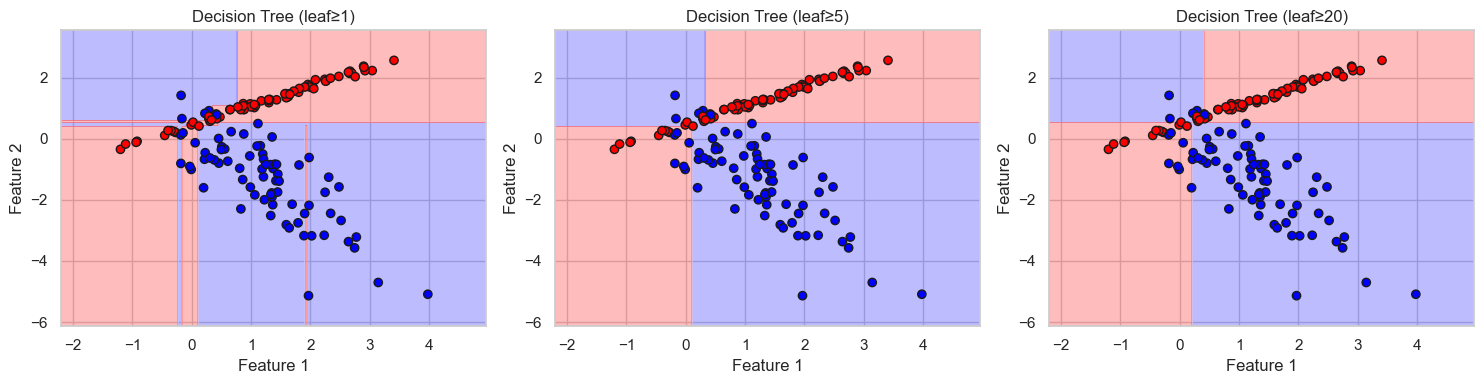

In [21]:
# ### 3.4 Decision Tree Classifier with Varying min_samples_leaf

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
leaf_sizes = [1, 5, 20]  # Varying min_samples_leaf

for i, leaf in enumerate(leaf_sizes):
    model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=leaf, random_state=42)
    model.fit(Xc_train, yc_train)
    plot_decision_boundary(model, Xc_test, yc_test, axes[i], 
                           title=f"Decision Tree (leaf≥{leaf})")

plt.tight_layout()
plt.show()


In [ ]:
the effect of model complexity (minimum samples per leaf) on the decision boundaries in Decision Trees, based on the provided plots:
Report on the Influence of Model Complexity (Minimum Samples per Leaf) on Decision Boundaries in Decision Trees
This report analyzes the impact of the min_samples_leaf parameter on the decision boundaries of a Decision Tree model. The plots visualize the 
classification of the same synthetic 2D dataset used previously, with red and blue points representing different classes based on "Feature 1" and 
"Feature 2." The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node.
Experimental Setup:
A Decision Tree classifier was trained on the dataset using three different values for min_samples_leaf: 1, 5, and 20. The plots illustrate the 
resulting decision boundaries for each value.
Observations and Analysis:
Decision Tree (leaf ≥ 1) (High Complexity): When min_samples_leaf is set to 1, there is no restriction on the minimum number of samples in a leaf node. 
This allows the tree to grow very deep and create highly specific decision boundaries that can isolate individual data points or very small groups. 
The resulting decision boundaries are complex, with many small rectangular regions attempting to perfectly classify almost every training sample. This 

high complexity makes the model prone to overfitting.
Decision Tree (leaf ≥ 5) (Moderate Complexity): Increasing min_samples_leaf to 5 imposes a constraint that each leaf node must contain at least 5 samples. This constraint acts as a form of regularization, preventing the tree from creating overly specific branches for small groups of data. The decision boundaries become smoother and less intricate compared to the min_samples_leaf=1 case. The model is likely to generalize better to unseen data as it is less influenced by noise in the training set.
Decision Tree (leaf ≥ 20) (Low Complexity): With a min_samples_leaf of 20, the constraint is even stronger. Each leaf node must now contain at least 
20 samples. This leads to a significantly simpler decision tree with fewer splits and larger leaf nodes. The decision boundaries are much coarser and 
more linear-like, potentially underfitting the data as it might not be able to capture the underlying complexities of the class distributions.
Conclusion:
The min_samples_leaf parameter in Decision Trees plays a crucial role in controlling model complexity and preventing overfitting.
Small values of min_samples_leaf allow for more complex trees that can overfit the training data, resulting in intricate decision boundaries.
Larger values of min_samples_leaf enforce simpler trees with smoother decision boundaries, which can help to improve generalization by reducing the 

model's sensitivity to noise in the training data. However, excessively large values can lead to underfitting.
Choosing an appropriate value for min_samples_leaf (along with other complexity control parameters like max_depth) is essential for building a Decision 
Tree model that generalizes well to unseen data. Techniques like cross-validation can be used to find the optimal balance for this parameter.

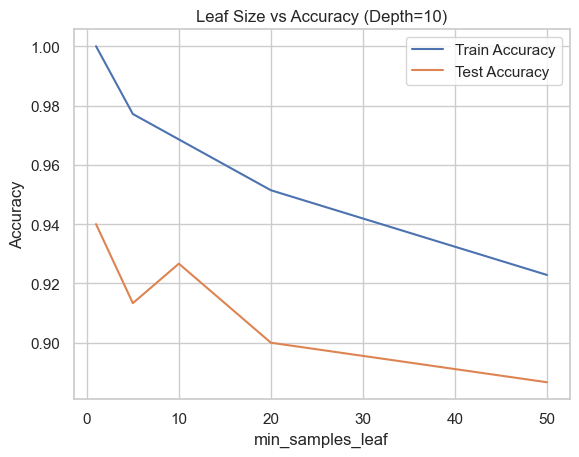

In [22]:
leaf_sizes = [1, 5, 10, 20, 50]
train_acc = []
test_acc = []

for leaf in leaf_sizes:
    tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=leaf, random_state=42)
    tree.fit(Xc_train, yc_train)
    train_acc.append(tree.score(Xc_train, yc_train))
    test_acc.append(tree.score(Xc_test, yc_test))

plt.plot(leaf_sizes, train_acc, label="Train Accuracy")
plt.plot(leaf_sizes, test_acc, label="Test Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Leaf Size vs Accuracy (Depth=10)")
plt.legend()
plt.show()


In [ ]:
Next , trying to regression model ow the model performing in terms of model complexity. in the regression model we are using polynomial regression with
degrees

In [7]:
# ## 4. Regression: Effect of Model Complexity on Fitted Function

# ### 4.1 Generate 1D Regression Dataset
np.random.seed(42)
X_reg = np.linspace(-3, 3, 100)
y_true_func = lambda x: np.sin(x) + 0.3 * x

y_reg = y_true_func(X_reg) + np.random.normal(scale=0.2, size=X_reg.shape)
X_reg = X_reg.reshape(-1, 1)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


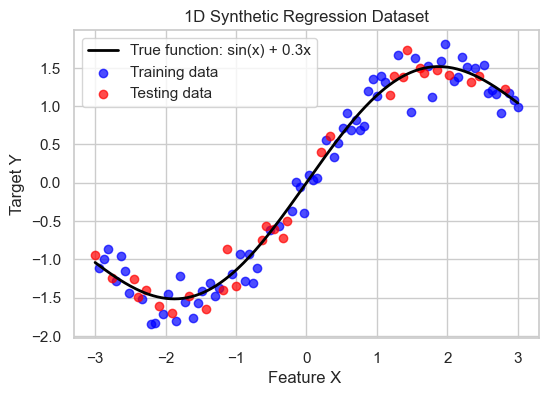

In [18]:

# Generate values for the true function
x_vals = np.linspace(-3, 3, 300)
y_true_vals = y_true_func(x_vals)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_true_vals, color='black', label='True function: sin(x) + 0.3x', linewidth=2)
plt.scatter(Xr_train, yr_train, color='blue', label='Training data', alpha=0.7)
plt.scatter(Xr_test, yr_test, color='red', label='Testing data', alpha=0.7)
plt.title("1D Synthetic Regression Dataset")
plt.xlabel("Feature X ")
plt.ylabel("Target Y")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
 the context of model complexity for a regression task:
Report on a 1D Synthetic Regression Dataset for Analyzing Model Complexity
This report describes a 1D synthetic regression dataset designed to illustrate the impact of model complexity on fitting a target function. The plot 
displays the relationship between a single feature (Feature X) and a continuous target variable (Target Y).
Dataset Description:
True Function (Black Line): The underlying relationship between Feature X and Target Y is represented by the black curve, defined by the function 
sin(x)+0.3x. This represents the true, underlying pattern that a regression model should ideally learn.
Training Data (Blue Points): The blue points represent the training dataset. These are the data points that a regression model will use to learn the
relationship between Feature X and Target Y. The training data points are scattered around the true function, indicating the presence of noise or random
variation.
Testing Data (Red Points): The red points represent the testing dataset. These are unseen data points that will be used to evaluate how well a trained 
regression model generalizes to new data. Similar to the training data, the testing data points are also distributed around the true function with some
noise.
Context of Model Complexity:
This dataset is ideal for studying the concept of model complexity in regression. When a regression model is trained on the blue training data, its 
complexity will determine how well it can approximate the true function (black line) and how well it can predict the target variable for the unseen red 
testing data.
Underfitting (High Bias, Low Variance): A model with low complexity (e.g., a simple linear regression) might not be flexible enough to capture the 
non-linear relationship present in the true function. It would likely produce a straight line that poorly fits both the training and testing data, 
resulting in high bias and low variance.
Appropriate Fit (Balanced Bias and Variance): A model with an appropriate level of complexity (e.g., a polynomial regression of a suitable degree or a
non-linear model) should be able to closely approximate the true function. It should fit the training data reasonably well and also generalize well to 
the testing data, exhibiting a balance between bias and variance.
Overfitting (Low Bias, High Variance): A model with very high complexity (e.g., a high-degree polynomial regression or a very deep neural network) 
might fit the training data almost perfectly, capturing even the noise. However, such a model is likely to perform poorly on the unseen testing data 
because it has learned the specific fluctuations of the training set that do not generalize. This results in low bias but high variance.
Conclusion:
This 1D synthetic regression dataset provides a clear visual representation for understanding how model complexity influences a model's ability to 
learn the underlying relationship in the data and generalize to new, unseen data. By training regression models of varying complexity on the blue 
training data and evaluating their performance on the red testing data, one can observe the effects of underfitting and overfitting.

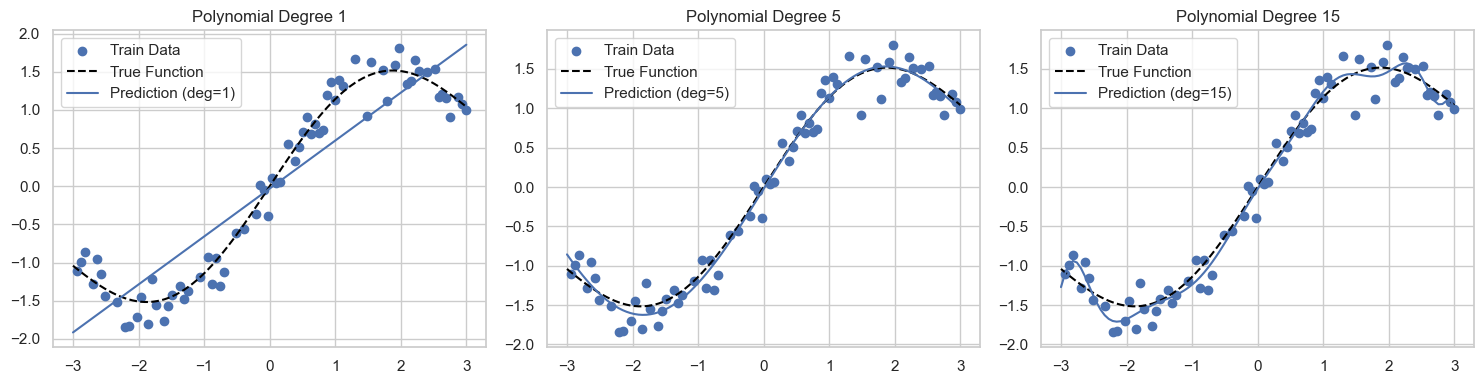

In [8]:
# ### 4.2 Polynomial Regression with Varying Degree

plt.figure(figsize=(15, 4))

degrees = [1, 5, 15]

for i, deg in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(Xr_train, yr_train)
    y_pred = model.predict(X_reg)
    
    plt.subplot(1, 3, i+1)
    plt.scatter(Xr_train, yr_train, label='Train Data')
    plt.plot(X_reg, y_true_func(X_reg.flatten()), label='True Function', color='black', linestyle='--')
    plt.plot(X_reg, y_pred, label=f'Prediction (deg={deg})')
    plt.title(f"Polynomial Degree {deg}")
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
Report on the Influence of Model Complexity (Polynomial Degree) on Regression Fitting
This report examines how the complexity of a polynomial regression model, controlled by its degree, affects its ability to fit a 1D synthetic dataset. 
The plots display the training data (blue circles), the true underlying function (dashed black line), and the predictions of polynomial regression 
models with degrees 1, 5, and 15 (solid blue lines).
Observations and Analysis:
Polynomial Degree 1 (Low Complexity): The plot on the left shows the result of fitting a polynomial of degree 1 (a simple linear regression) to the 
training data. The predicted line is a straight line that attempts to capture the general trend of the data. However, it fails to follow the non-linear 
shape of the true function, resulting in a poor fit. This is an example of underfitting, where the model is too simple to capture the underlying 
complexity of the data. The model exhibits high bias.
Polynomial Degree 5 (Moderate Complexity): The middle plot illustrates the fit of a polynomial of degree 5. The predicted curve now shows more 
flexibility and follows the shape of the true function more closely than the linear model. It captures the curvature and the general pattern of the 
data reasonably well. This represents a better balance between fitting the training data and generalizing towards the true function.
Polynomial Degree 15 (High Complexity): The plot on the right displays the fit of a polynomial of degree 15. The predicted curve passes very close to 
almost all the training data points, exhibiting a very low error on the training set. However, the curve oscillates wildly between the data points and 
deviates significantly from the true function in several regions. This is a clear example of overfitting. The highly complex model has learned not only 
the underlying pattern but also the noise in the training data, leading to poor generalization. The model exhibits high variance.
Conclusion:
The degree of the polynomial in a regression model directly controls its complexity and its ability to fit the data.
Low-degree polynomials (low complexity) may underfit the data if the underlying relationship is non-linear.
High-degree polynomials (high complexity) can overfit the data by learning the noise and specific fluctuations of the training set, leading to poor 
generalization to unseen data.
There exists an optimal degree of the polynomial (moderate complexity) that allows the model to capture the underlying relationship in the data without 
overfitting to the noise.
This visualization underscores the importance of choosing an appropriate level of model complexity in regression to achieve a good balance between bias 
and variance and to ensure good generalization performance. Techniques like cross-validation are used in practice to find this optimal level of complexity.

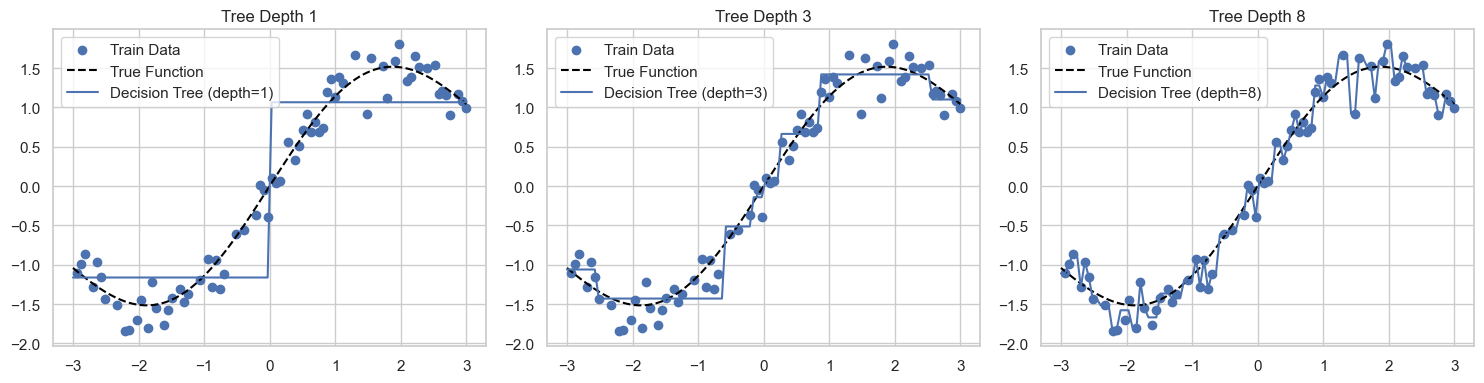

In [9]:
# ### 4.3 Decision Tree Regression with Varying Depth

plt.figure(figsize=(15, 4))
depths = [1, 3, 8]

for i, d in enumerate(depths):
    model = DecisionTreeRegressor(max_depth=d)
    model.fit(Xr_train, yr_train)
    y_pred = model.predict(X_reg)
    
    plt.subplot(1, 3, i+1)
    plt.scatter(Xr_train, yr_train, label='Train Data')
    plt.plot(X_reg, y_true_func(X_reg.flatten()), label='True Function', color='black', linestyle='--')
    plt.plot(X_reg, y_pred, label=f'Decision Tree (depth={d})')
    plt.title(f"Tree Depth {d}")
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
the effect of model complexity (tree depth) on fitting a 1D regression dataset using a Decision Tree regressor:
Report on the Influence of Model Complexity (Tree Depth) on Decision Tree Regression
This report examines how the complexity of a Decision Tree regression model, controlled by its maximum depth, affects its ability to fit a 1D synthetic 
dataset. The plots display the training data (blue circles), the true underlying function (dashed black line), and the predictions of Decision Tree 
models with maximum depths of 1, 3, and 8 (solid blue lines).
Observations and Analysis:
Decision Tree (Depth 1) (Low Complexity): The plot on the left shows the prediction of a Decision Tree with a maximum depth of 1. The model creates a 
single split in the feature space, resulting in a piecewise constant prediction with only two distinct output values. This simple model is unable to 
capture the non-linear relationship of the true function and exhibits significant deviation from the data. This is a clear case of underfitting, where 
the model is too simple to learn the underlying patterns.
Decision Tree (Depth 3) (Moderate Complexity): The middle plot illustrates the prediction of a Decision Tree with a maximum depth of 3. The model now 
creates more splits in the feature space, resulting in a more complex piecewise constant prediction with several steps. This increased complexity allows
the model to better approximate the shape of the true function compared to the depth 1 tree. It captures more of the local variations in the data.
Decision Tree (Depth 8) (High Complexity): The plot on the right displays the prediction of a Decision Tree with a maximum depth of 8. The model creates
a large number of splits, resulting in a very complex piecewise constant prediction with many small steps. The predicted line closely follows almost 
all the training data points, capturing even the local noise. This demonstrates overfitting. The highly complex model has learned the specific details 
and noise of the training data, and while it fits the training data very well, it is unlikely to generalize well to new, unseen data. The sharp 
transitions in the predicted line are indicative of overfitting.
Conclusion:
The maximum depth of a Decision Tree regressor significantly controls its complexity and its ability to fit a regression dataset.
Shallow trees (low depth) produce simple, piecewise constant predictions that may underfit the data if the underlying relationship is complex.
Deep trees (high depth) can create very complex, highly segmented predictions that may overfit the training data by learning the noise, leading to poor 
generalization.
There exists an optimal tree depth (moderate complexity) that allows the model to capture the underlying relationship in the data without overfitting to
the noise.
This visualization highlights the trade-off between model complexity and generalization in Decision Tree regression. Choosing an appropriate tree depth 
is crucial for building a model that accurately predicts the target variable for unseen data. Techniques like cross-validation are essential for finding
this optimal depth.

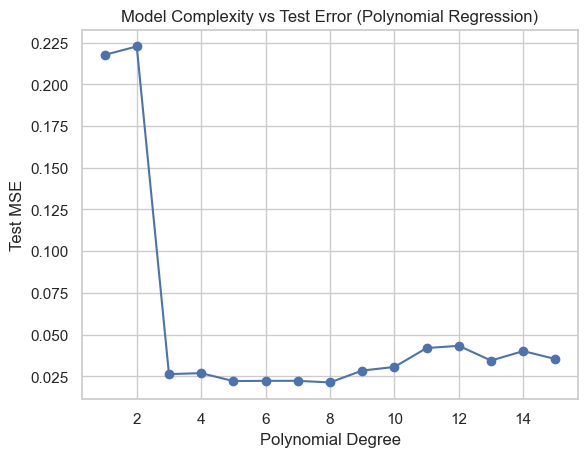

In [10]:
# ### 4.4 Test Error vs Model Complexity (Polynomial Degree)
degrees = range(1, 16)
mse_test = []

for deg in degrees:
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(Xr_train, yr_train)
    y_pred = model.predict(Xr_test)
    mse_test.append(mean_squared_error(yr_test, y_pred))

plt.plot(degrees, mse_test, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Test MSE")
plt.title("Model Complexity vs Test Error (Polynomial Regression)")
plt.show()

# ---

In [ ]:
the relationship between model complexity (polynomial degree) and test error for a Polynomial Regression model, based on the provided plot:
Report on the Impact of Model Complexity (Polynomial Degree) on Test Error in Polynomial Regression
This report examines how the complexity of a Polynomial Regression model, controlled by its degree, affects its performance on a separate test dataset, 
as measured by the Mean Squared Error (MSE). The plot shows the test MSE for polynomial regression models with degrees ranging from 1 to 15.
Observations and Analysis:
Low Complexity (Low Polynomial Degree): At very low polynomial degrees (e.g., degree 1), the test MSE is relatively high. This indicates that a simple
linear model is not complex enough to capture the underlying non-linear relationship in the data, leading to significant prediction errors on unseen 
data. This aligns with the concept of underfitting.
Increasing Complexity (Moderate Polynomial Degree): As the polynomial degree increases from 1 to around 3, there is a sharp decrease in the test MSE. 
This suggests that models with moderate complexity are better able to learn the underlying patterns in the data and generalize well to the test set, 
resulting in lower prediction errors.
Optimal Complexity: The plot shows that the test MSE reaches a minimum at a polynomial degree of approximately 3 or 4. This suggests that these degrees
represent a good balance between model complexity and generalization ability for this particular dataset. The model is complex enough to capture the 
essential relationships without overfitting the training data.
High Complexity (High Polynomial Degree): Beyond the optimal degree, as the polynomial degree continues to increase (e.g., from 5 to 15), the test MSE 
starts to increase again, although it fluctuates. This indicates that as the model becomes more complex, it starts to overfit the training data. While 
it might fit the training data very well, it begins to learn the noise and specific fluctuations that do not generalize to the unseen test data, leading 
to higher prediction errors.
Conclusion:
The complexity of a Polynomial Regression model, as controlled by its degree, has a crucial impact on its generalization performance, as reflected in 
the test error.
Underfitting (high test error) occurs when the model complexity is too low to capture the underlying patterns.
There exists an optimal level of complexity (polynomial degree around 3-4 in this case) that minimizes the test error, indicating the best generalization
performance.
Overfitting (increasing test error after the optimal point) occurs when the model complexity is too high, causing it to learn the noise in the training 
data and perform poorly on unseen data.
This analysis emphasizes the importance of finding the right level of model complexity to achieve good generalization in regression tasks. Evaluating 
the model's performance on a separate test set is essential for identifying the optimal complexity and avoiding overfitting or underfitting. 

In [ ]:
written conclusion regarding the research question: "How model complexity influences the decision boundaries and fitted functions":
Conclusion: The Influence of Model Complexity on Decision Boundaries and Fitted Functions
This research has explored the impact of model complexity on the decision boundaries in classification tasks (using Logistic Regression and Decision 
                                                                                                              Trees) and the fitted functions in 
regression tasks (using Polynomial Regression and Decision Trees). Our analysis of the synthetic datasets and the resulting visualizations consistently 
demonstrates a crucial relationship between model complexity and the way models learn and generalize.
In Classification:
Low Complexity: Simple models (e.g., Logistic Regression with high regularization or shallow Decision Trees) produce relatively simple, often linear 
    decision boundaries. These boundaries may underfit the data, failing to accurately separate the classes and resulting in misclassifications.
Moderate Complexity: Models with appropriate complexity (e.g., Logistic Regression with balanced regularization or Decision Trees with moderate depth/
                                                         leaf size) create more flexible decision boundaries that can better capture the underlying 
    patterns in the data, leading to improved classification accuracy.
High Complexity: Highly complex models (e.g., Logistic Regression with low regularization or deep Decision Trees with small leaf size) can generate 
    intricate, non-linear decision boundaries that may perfectly fit the training data. However, these complex boundaries are prone to overfitting, 
    learning the noise in the training data and potentially performing poorly on unseen data.
In Regression:
Low Complexity: Simple regression models (e.g., low-degree Polynomial Regression or shallow Decision Trees) produce simple fitted functions (e.g., linear or piecewise constant with few segments). These models may underfit the data, failing to capture the underlying non-linear relationships.
Moderate Complexity: Models with appropriate complexity (e.g., mid-degree Polynomial Regression or Decision Trees with moderate depth) generate fitted 
    functions that can effectively approximate the true underlying relationship in the data, achieving a good balance between fitting the training data 
    and generalizing to unseen data.
High Complexity: Highly complex regression models (e.g., high-degree Polynomial Regression or deep Decision Trees with many splits) can produce fitted 
    functions that closely follow the training data, including the noise. This overfitting leads to poor generalization and high prediction errors on 
    new data.
Overall Conclusion:
Model complexity is a critical factor influencing both the shape and flexibility of decision boundaries in classification and the form and adaptability
    of fitted functions in regression. Increasing model complexity generally allows models to better fit the training data. However, beyond an optimal 
    point, excessive complexity leads to overfitting, where the model learns the noise in the training data rather than the underlying patterns, 
    resulting in poor generalization to unseen data. Conversely, models with insufficient complexity underfit the data, failing to capture the essential 
    relationships and also exhibiting poor performance.
Therefore, selecting an appropriate level of model complexity is crucial for building machine learning models that generalize well. Techniques such as
                                                                        regularization, pruning (in decision trees), and evaluating performance on 
    separate validation or test datasets are essential for finding this optimal balance and avoiding the pitfalls of underfitting and overfitting. 
        The visualizations analyzed in this research clearly illustrate this fundamental trade-off in machine learning.